# Bankruptcy Prevention Project

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [127]:
data=pd.read_csv("D:/ExcelR/Project P138 - Bankruptcy Prevention/bankruptcy-prevention.csv",sep=';')

In [128]:
data.shape

(250, 7)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [130]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [131]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [132]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [133]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [134]:
data['class'].replace({'bankruptcy':1,'non-bankruptcy':0},inplace=True)

In [135]:
data.sample(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
190,0.0,0.5,0.5,0.0,1.0,0.0,0
19,0.0,0.5,0.0,0.0,0.0,0.5,1
212,0.5,0.0,0.5,1.0,0.5,0.0,0
142,0.0,1.0,1.0,1.0,0.5,1.0,0
97,1.0,1.0,0.0,0.5,0.0,0.5,1
118,0.0,0.0,1.0,0.5,1.0,0.0,0
240,0.0,1.0,0.5,0.5,0.5,0.0,0
24,1.0,1.0,0.0,0.0,0.0,0.5,1
165,1.0,0.0,0.0,1.0,1.0,0.5,0
220,0.5,0.5,1.0,1.0,1.0,0.5,0


In [136]:
data['class'].value_counts()

0    143
1    107
Name: class, dtype: int64

In [137]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.428000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
class,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


array([[<AxesSubplot:title={'center':'industrial_risk'}>,
        <AxesSubplot:title={'center':'management_risk'}>,
        <AxesSubplot:title={'center':'financial_flexibility'}>],
       [<AxesSubplot:title={'center':'credibility'}>,
        <AxesSubplot:title={'center':'competitiveness'}>,
        <AxesSubplot:title={'center':'operating_risk'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

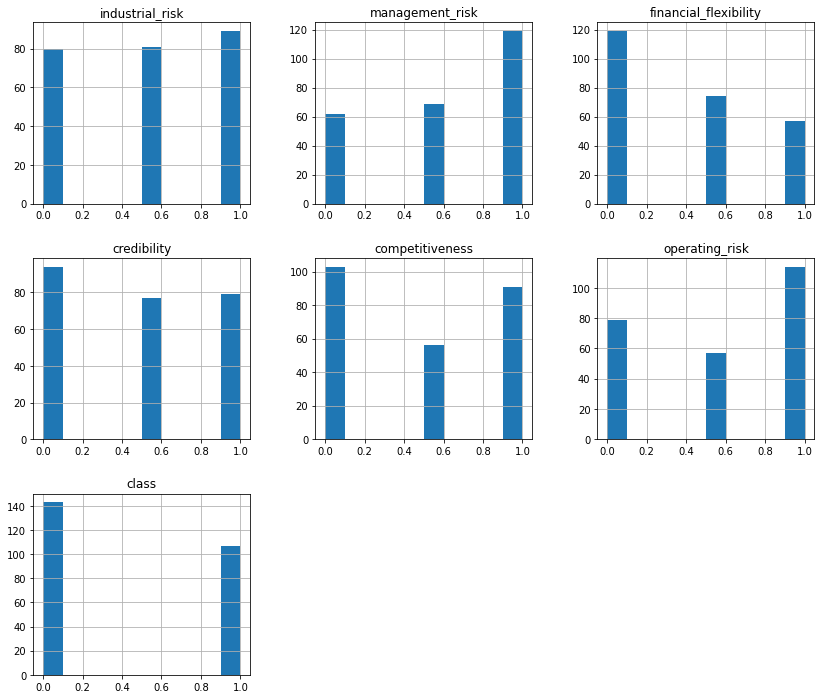

In [139]:
data.hist(figsize=(14, 12))

In [140]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

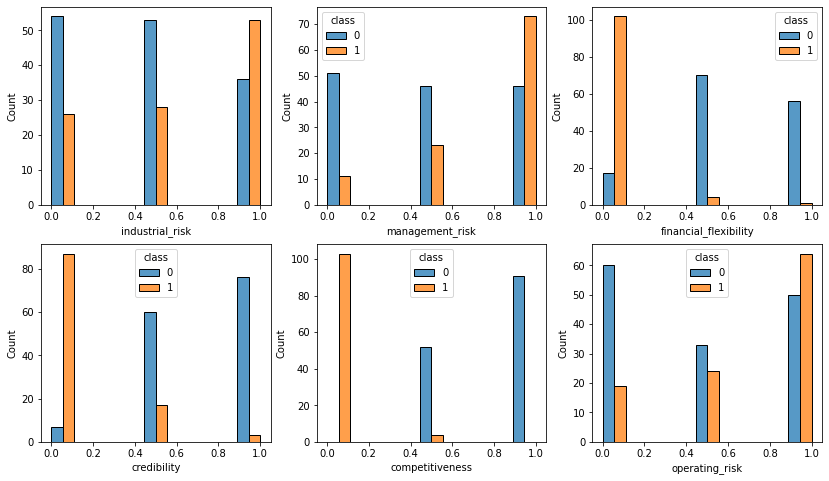

In [141]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))
sns.histplot(data=data,x='industrial_risk',ax=axs[0,0],hue='class',multiple='dodge',legend=False)
sns.histplot(data=data,x='management_risk',ax=axs[0,1],hue='class',multiple='dodge')
sns.histplot(data=data,x='financial_flexibility',ax=axs[0,2],hue='class',multiple='dodge')
sns.histplot(data=data,x='credibility',ax=axs[1,0],hue='class',multiple='dodge')
sns.histplot(data=data,x='competitiveness',ax=axs[1,1],hue='class',multiple='dodge')
sns.histplot(data=data,x='operating_risk',ax=axs[1,2],hue='class',multiple='dodge')
plt.show()

<AxesSubplot:>

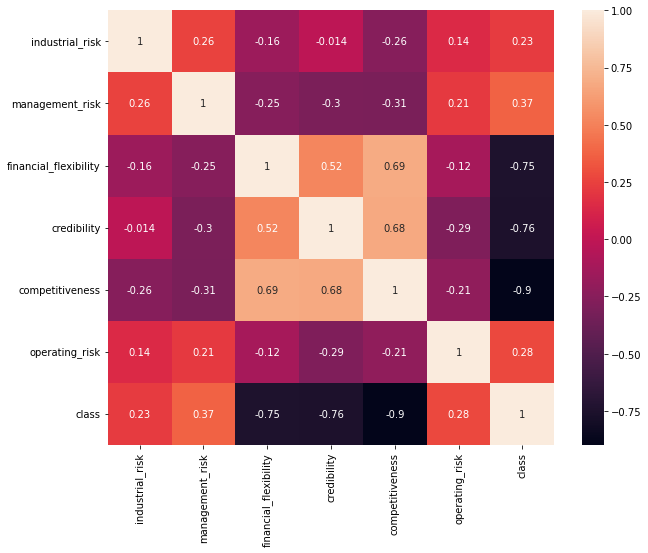

In [142]:
correlation=data.corr()
fig, axs = plt.subplots(figsize=(10,8))
sns.heatmap(data=correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,
            annot=True,ax=axs)

In [143]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [145]:
summary = pd.DataFrame(columns=['Model','Training Accuracy','Testing Accuracy'])

# Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [147]:
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

In [148]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [149]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  99.5 %
Testing Accuracy =  100.0 %


In [150]:
summary = pd.concat([summary,pd.DataFrame(data=[['Logistic Regression',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# K-NN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [152]:
y_pred_train = KNN_model.predict(X_train)
y_pred_test = KNN_model.predict(X_test)

In [153]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [154]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  99.0 %
Testing Accuracy =  100.0 %


In [155]:
summary = pd.concat([summary,pd.DataFrame(data=[['K-NN',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# Linear SVM

In [156]:
from sklearn.svm import SVC
LinearSVM = SVC(kernel = 'linear')
LinearSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [157]:
y_pred_train = LinearSVM.predict(X_train)
y_pred_test = LinearSVM.predict(X_test)

In [158]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [159]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  99.5 %
Testing Accuracy =  100.0 %


In [160]:
summary = pd.concat([summary,pd.DataFrame(data=[['Linear SVM',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# Kernel SVM

In [161]:
from sklearn.svm import SVC
KernelSVM = SVC(kernel = 'rbf')
KernelSVM.fit(X_train, y_train)

SVC()

In [162]:
y_pred_train = KernelSVM.predict(X_train)
y_pred_test = KernelSVM.predict(X_test)

In [163]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [164]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  100.0 %
Testing Accuracy =  100.0 %


In [165]:
summary = pd.concat([summary,pd.DataFrame(data=[['Kernel SVM',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# Naive Bayes

In [166]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [167]:
y_pred_train = NB_model.predict(X_train)
y_pred_test = NB_model.predict(X_test)

In [168]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [169]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  97.0 %
Testing Accuracy =  100.0 %


In [170]:
summary = pd.concat([summary,pd.DataFrame(data=[['Naive Bayes',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy')
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [172]:
y_pred_train = DT_model.predict(X_train)
y_pred_test = DT_model.predict(X_test)

In [173]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [174]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  100.0 %
Testing Accuracy =  100.0 %


In [175]:
summary = pd.concat([summary,pd.DataFrame(data=[['Decision Tree',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [177]:
y_pred_train = RF_model.predict(X_train)
y_pred_test = RF_model.predict(X_test)

In [178]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [179]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  100.0 %
Testing Accuracy =  100.0 %


In [180]:
summary = pd.concat([summary,pd.DataFrame(data=[['Random Forest',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

# ANN

In [181]:
import tensorflow as tf

In [182]:
ann = tf.keras.models.Sequential()

In [183]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [184]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [185]:
ann.fit(X_train, y_train, batch_size = 6, epochs = 20)

Epoch 1/20
34/34 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.4350
Epoch 2/20
34/34 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.4700
Epoch 3/20
34/34 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7050
Epoch 4/20
34/34 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.8450
Epoch 5/20
34/34 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.9000
Epoch 6/20
34/34 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.9300
Epoch 7/20
34/34 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.9350
Epoch 8/20
34/34 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.9500
Epoch 9/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.9750
Epoch 10/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9750
Epoch 11/20
34/34 [

In [186]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)
y_pred_train = (y_pred_train > 0.5)
y_pred_test = (y_pred_test > 0.5)

2/2 [==============================] - 0s 2ms/step


In [187]:
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test)*100

In [188]:
print("Training Accuracy = ",train_acc,"%")
print("Testing Accuracy = ",test_acc,"%")

Training Accuracy =  99.0 %
Testing Accuracy =  100.0 %


In [189]:
summary = pd.concat([summary,pd.DataFrame(data=[['ANN',train_acc,test_acc]],
                                  columns=summary.columns)],ignore_index=True)

In [190]:
summary

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,99.5,100.0
1,K-NN,99.0,100.0
2,Linear SVM,99.5,100.0
3,Kernel SVM,100.0,100.0
4,Naive Bayes,97.0,100.0
5,Decision Tree,100.0,100.0
6,Random Forest,100.0,100.0
7,ANN,99.0,100.0


In [193]:
import pickle

In [194]:
with open('P138_model', 'wb') as file:
    pickle.dump(KernelSVM, file)